In [47]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
% matplotlib inline

UsageError: Line magic function `%` not found.


In [48]:
train_data=pd.read_csv('Desktop/development_dataset.csv')
leader_data=pd.read_csv('Desktop/leaderboard_dataset.csv')
evaluation_data=pd.read_csv('Desktop/Evaluation_dataset.csv')
train_data.head()
combine=[train_data,leader_data,evaluation_data]

In [49]:
train_index=pd.read_excel('Desktop/Data_Dictionary.xlsx')
train_index.head()

,Unnamed: 0,Variable Name,Definition
0,VAR1,ID,The identifier for the account
1,VAR2,FICO,Credit score associated with account. Takes in...
2,VAR3,Business Revenue,Reported annual business revenue
3,VAR4,TSR,Risk score associated with probability of defa...
4,VAR5,Last 6M Avg Util,Average utilization of credit line in the last...


In [50]:
train_index=train_index.iloc[:21]

In [51]:
train_index

,Unnamed: 0,Variable Name,Definition
0,VAR1,ID,The identifier for the account
1,VAR2,FICO,Credit score associated with account. Takes in...
2,VAR3,Business Revenue,Reported annual business revenue
3,VAR4,TSR,Risk score associated with probability of defa...
4,VAR5,Last 6M Avg Util,Average utilization of credit line in the last...
5,VAR6,Income,Reported annual business income
6,VAR7,Last 6M Avg Remit,Average amount paid towards card bills in the ...
7,VAR8,Last 6M Avg Bal,Average balance on each card in the last 6 months
8,VAR9,Internal Revolve,The average daily balance as a percentage of c...
9,VAR10,Lending AR% in last 6M,Percentage of internal balance (with XYZEE) on...


In [52]:
header=[]
for i in train_index['Variable Name']:
    header.append(i)

In [53]:
train_data.columns=header
leader_data.columns=header[:-1]
evaluation_data.columns=header[:-1]

In [54]:
for dataset in combine:
    dataset.set_index('ID',inplace=True)

In [55]:
train_data.head()

,FICO,Business Revenue,TSR,Last 6M Avg Util,Income,Last 6M Avg Remit,Last 6M Avg Bal,Internal Revolve,Lending AR% in last 6M,ExternalBalance,Months in Business,preferred_spend_line,total_cards,preferred_bal_line,preavgremit1_3_all,External_rev_rate,Supplementary Cards,isChargeCust,CMV,Assigned Line
ID,,,,,,,,,,,,,,,,,,,,
1,828.235294,0.138889,321.428571,625.911006,1.818182,1.081550,198.113469,NaN,58.632548,0.279273,100.083403,1.0,1,1.0,1.540594,NaN,1,0,100.104991,Low
2,911.764706,0.027778,NaN,611.574748,8.181818,1.344479,198.600020,22.086661,NaN,NaN,15.012510,NaN,1,NaN,1.614613,NaN,0,1,146.654045,High
3,962.352941,0.833333,35.714286,615.825381,8.181818,0.720796,197.267767,NaN,58.632548,0.453212,210.175146,10.0,1,10.0,1.044599,NaN,0,0,98.249570,Medium
4,892.941177,NaN,NaN,638.076431,9.090909,0.820218,197.355744,4.363431,58.632548,NaN,NaN,NaN,1,NaN,1.145729,NaN,1,0,140.862306,Low
5,914.117647,0.083333,NaN,626.514988,5.181818,1.372928,198.790477,85.938202,58.632548,NaN,210.175146,NaN,.,NaN,1.558341,NaN,1,0,101.268503,High


In [56]:
train_data.describe()

,FICO,Business Revenue,TSR,Last 6M Avg Util,Income,Last 6M Avg Remit,Last 6M Avg Bal,Internal Revolve,Lending AR% in last 6M,ExternalBalance,Months in Business,preferred_spend_line,preferred_bal_line,preavgremit1_3_all,External_rev_rate,Supplementary Cards,isChargeCust,CMV
count,33039.000000,30615.000000,21506.000000,33999.000000,30505.000000,33165.000000,33165.000000,18183.000000,29450.000000,26435.000000,23498.000000,25478.000000,25976.000000,33134.000000,11806.000000,34000.000000,34000.000000,34000.000000
mean,917.391603,1.119596,248.076201,631.571391,15.290028,2.055295,200.007169,53.988554,56.497320,5.429062,117.283667,11.679589,12.453257,2.092006,821.281092,0.400029,0.298059,161.355950
std,50.222389,12.714724,241.167723,30.863288,29.123815,8.960891,11.282223,84.573655,6.861058,11.433905,120.628594,11.063966,12.084965,8.051804,262.338240,0.684850,0.457412,123.231136
min,730.588235,0.001333,18.928571,347.053355,0.005000,0.353228,0.000000,0.004278,13.028620,0.000693,0.834028,0.082667,0.133333,0.959315,0.130000,0.000000,0.000000,0.000000
25%,882.352941,0.083333,71.428571,611.691167,6.636364,0.691201,197.196716,8.784613,57.458373,0.638239,15.012510,5.666667,6.666667,1.040125,732.662500,0.000000,0.000000,104.385542
50%,924.705882,0.166667,142.857143,619.802909,10.000000,0.998093,197.912501,22.086661,58.632548,2.098360,80.066722,10.000000,10.000000,1.262747,965.345000,0.000000,0.000000,117.493115
75%,956.470588,0.555556,357.142857,637.450565,18.181818,1.735250,199.687427,58.559811,58.632548,6.043179,193.494579,15.333333,16.400000,1.827486,1000.000000,1.000000,1.000000,159.446213
max,1000.000000,1000.000000,1000.000000,1000.000000,909.090818,681.582083,1000.000000,993.061289,1000.000000,824.334457,1000.000000,775.000000,775.000000,1000.000000,1000.000000,14.000000,1.000000,1000.000000


In [57]:
train_data.groupby('Assigned Line').mean()

,FICO,Business Revenue,TSR,Last 6M Avg Util,Income,Last 6M Avg Remit,Last 6M Avg Bal,Internal Revolve,Lending AR% in last 6M,ExternalBalance,Months in Business,preferred_spend_line,preferred_bal_line,preavgremit1_3_all,External_rev_rate,Supplementary Cards,isChargeCust,CMV
Assigned Line,,,,,,,,,,,,,,,,,,
High,917.761955,1.744415,236.177945,634.036341,17.180884,2.772040,201.223055,58.551239,56.505182,6.079924,129.090890,13.040995,13.821024,2.611842,799.869831,0.437950,0.345877,179.900710
Low,908.439733,0.669297,284.577485,633.064683,13.792250,2.130035,200.142140,52.753379,56.344940,5.858337,101.404708,10.583967,11.459557,2.183283,841.422414,0.368678,0.310239,155.548788
Medium,923.313054,1.273387,225.169069,630.070284,15.884088,1.859503,199.669676,53.989727,56.594329,5.018778,125.313861,12.065549,12.776795,1.925887,811.165484,0.413053,0.280101,161.392771


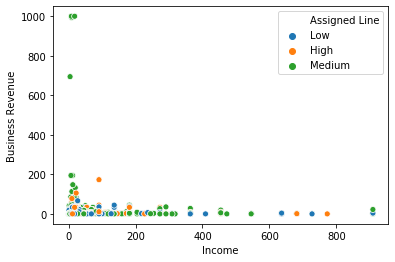

In [58]:
sns.scatterplot(train_data['Income'],train_data['Business Revenue'],hue=train_data['Assigned Line'])

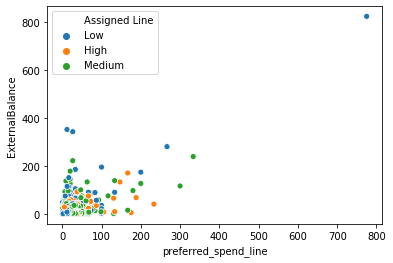

In [59]:
sns.scatterplot(train_data['preferred_spend_line'],train_data['ExternalBalance'],hue=train_data['Assigned Line'])

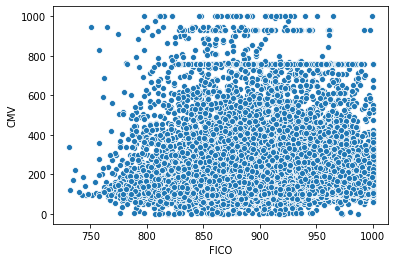

In [60]:
sns.scatterplot(train_data['FICO'],train_data['CMV'])

In [61]:
total = train_data.isnull().sum().sort_values(ascending=False)
percent = (train_data.isnull().sum()/train_data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
External_rev_rate,22194,0.652765
Internal Revolve,15817,0.465206
TSR,12494,0.367471
Months in Business,10502,0.308882
preferred_spend_line,8522,0.250647
preferred_bal_line,8024,0.236000
ExternalBalance,7565,0.222500
Lending AR% in last 6M,4550,0.133824
Income,3495,0.102794
Business Revenue,3385,0.099559


In [62]:
for dataset in combine:
    dataset.drop(['Internal Revolve'],axis=1,inplace=True)
    dataset.drop(['External_rev_rate'],axis=1,inplace=True)
    dataset.FICO=dataset.FICO.fillna(dataset.FICO.median())
    dataset.TSR=dataset.TSR.fillna(dataset.TSR.mean())

In [63]:
for dataset in combine:
    dataset['Months in Business']=dataset['Months in Business'].fillna(dataset['Months in Business'].mode()[0])


In [64]:
for dataset in combine:
    dataset['Income']=dataset['Income'].fillna(dataset['Income'].mode()[0])
    dataset['Business Revenue']=dataset['Business Revenue'].fillna(dataset['Business Revenue'].mode()[0])

In [65]:
#for dataset in combine:
#    dataset['FICO/TSR']=dataset.FICO/dataset.TSR

#for dataset in combine:
    #dataset['CMV/TSR'] = dataset['CMV']/dataset['TSR']

In [66]:
#for dataset in combine:
#    dataset['Business Related3'] = dataset['Months in Business']*dataset['Business Revenue']*dataset['Income']

In [67]:
for dataset in combine:
    dataset['FICO*CMV/TSR'] = dataset['FICO']*dataset['CMV']/dataset['TSR']

for dataset in combine:
    dataset['3m - 6m'] = dataset['preavgremit1_3_all'] - dataset['Last 6M Avg Remit']
    
#for dataset in combine:
#    dataset['Business Related'] = dataset['Months in Business']*dataset['Business Revenue']
    
for dataset in combine:
    dataset['Business Related2'] = dataset['Months in Business']*dataset['Income']
    
#for dataset in combine:
#    dataset['Business Related4'] = dataset['Income']/dataset['Business Revenue']

#for dataset in combine:
#    dataset['CVM*FICO'] = dataset['FICO']*dataset['CMV']

#for dataset in combine:
#    dataset['external util'] = dataset['ExternalBalance']/dataset['preferred_bal_line']


In [68]:
#train_data['preavgremit1_3_all'].mode()

In [69]:
#for dataset in combine:
#        dataset.drop(['preferred_bal_line'],axis=1,inplace=True)

In [70]:
#for dataset in combine:
#    dataset['preferred_bal_line']=dataset['preferred_bal_line'].fillna(dataset['preferred_bal_line'].median())

In [71]:
#for dataset in combine:
#    dataset['preferred_spend_line']=dataset['preferred_spend_line'].fillna(dataset['preferred_spend_line'].mode())

In [72]:
#train_data['preferred_spend_line'].mode()
#for dataset in combine:
#    dataset.drop(['ExternalBalance'],axis=1,inplace=True)
#for dataset in combine:
#    dataset['ExternalBalance']=dataset['ExternalBalance'].fillna(dataset['ExternalBalance'].mean())

In [73]:
#for dataset in combine:
    #dataset.drop(['Lending AR% in last 6M'],axis=1,inplace=True)


In [74]:
#for dataset in combine:
 #   dataset['preavgremit1_3_all']=dataset['preavgremit1_3_all'].fillna(dataset['preavgremit1_3_all'].mean())
    #dataset['Last 6M Avg Bal']=dataset['Last 6M Avg Bal'].fillna(dataset['Last 6M Avg Bal'].median())
    #dataset['Last 6M Avg Util']=dataset['Last 6M Avg Util'].fillna(dataset['Last 6M Avg Util'].median())

In [75]:
#for dataset in combine:
#    dataset.drop(['Last 6M Avg Remit'],axis=1,inplace=True)

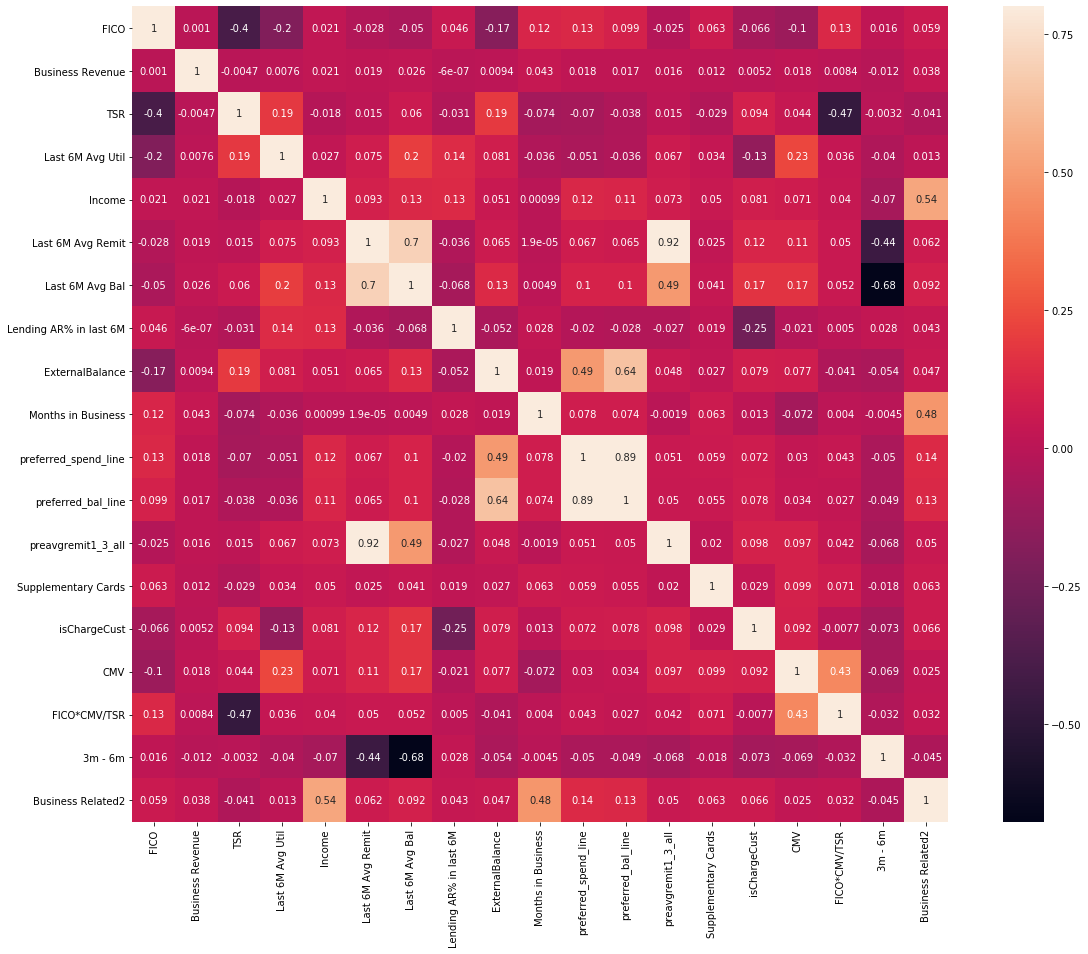

In [76]:
corrmat = train_data.corr()
f, ax = plt.subplots(figsize=(20, 15))
sns.heatmap(corrmat, vmax=.8, square=True,annot=True)

In [77]:
evaluation_data.isnull().sum()

FICO                         0
Business Revenue             0
TSR                          0
Last 6M Avg Util             0
Income                       0
Last 6M Avg Remit          244
Last 6M Avg Bal            244
Lending AR% in last 6M    1371
ExternalBalance           2216
Months in Business           0
preferred_spend_line      2494
total_cards                  0
preferred_bal_line        2341
preavgremit1_3_all         251
Supplementary Cards          0
isChargeCust                 0
CMV                          0
FICO*CMV/TSR                 0
3m - 6m                    251
Business Related2            0
dtype: int64

In [78]:
for dataset in combine:
    dataset.loc[(dataset['total_cards'] =='.'), 'total_cards'] = 0

In [79]:
for dataset in combine:
    dataset.loc[(dataset['total_cards'] ==0), 'total_cards'] = '0'
train_data.total_cards.value_counts()

1      20816
2       7965
3       2796
0       1029
4        910
5        269
6        117
7         31
8         26
10        14
12         9
9          8
15         2
11         2
14         1
104        1
22         1
23         1
20         1
18         1
Name: total_cards, dtype: int64

In [80]:
for dataset in combine:
    dataset.total_cards = dataset.total_cards.astype(int)
type(train_data.total_cards.iloc[0])

numpy.int32

In [81]:
#for dataset in combine:
#dataset['Internal Cards'] = dataset['total_cards'] + dataset['Supplementary Cards']

In [82]:
train_data.groupby('Assigned Line').mean()

,FICO,Business Revenue,TSR,Last 6M Avg Util,Income,Last 6M Avg Remit,Last 6M Avg Bal,Lending AR% in last 6M,ExternalBalance,Months in Business,preferred_spend_line,total_cards,preferred_bal_line,preavgremit1_3_all,Supplementary Cards,isChargeCust,CMV,FICO*CMV/TSR,3m - 6m,Business Related2
Assigned Line,,,,,,,,,,,,,,,,,,,,
High,917.969513,1.679360,239.569281,634.036341,16.637507,2.772040,201.223055,56.505182,6.079924,103.659464,13.040995,1.566853,13.821024,2.611842,0.437950,0.345877,179.900710,1377.154023,-0.164145,1831.282262
Low,908.822117,0.590919,271.630874,633.064683,13.528502,2.130035,200.142140,56.344940,5.858337,82.273470,10.583967,1.562453,11.459557,2.183283,0.368678,0.310239,155.548788,1053.641295,0.051946,1108.956322
Medium,923.356359,1.152267,234.170821,630.070284,15.428112,1.859503,199.669676,56.594329,5.018778,98.723540,12.065549,1.489764,12.776795,1.925887,0.413053,0.280101,161.392771,1235.757574,0.065386,1492.649054


In [83]:
#for dataset in combine:
#    dataset['total internal balance'] = dataset['Lending AR% in last 6M']*dataset['total_cards']

In [84]:
X_train = train_data.drop('Assigned Line', axis=1)
y_train = train_data['Assigned Line']
X_train.head()

,FICO,Business Revenue,TSR,Last 6M Avg Util,Income,Last 6M Avg Remit,Last 6M Avg Bal,Lending AR% in last 6M,ExternalBalance,Months in Business,preferred_spend_line,total_cards,preferred_bal_line,preavgremit1_3_all,Supplementary Cards,isChargeCust,CMV,FICO*CMV/TSR,3m - 6m,Business Related2
ID,,,,,,,,,,,,,,,,,,,,
1,828.235294,0.138889,321.428571,625.911006,1.818182,1.081550,198.113469,58.632548,0.279273,100.083403,1.0,1,1.0,1.540594,1,0,100.104991,257.943737,0.459044,181.969823
2,911.764706,0.027778,248.076201,611.574748,8.181818,1.344479,198.600020,NaN,NaN,15.012510,NaN,1,NaN,1.614613,0,1,146.654045,539.003666,0.270134,122.829631
3,962.352941,0.833333,35.714286,615.825381,8.181818,0.720796,197.267767,58.632548,0.453212,210.175146,10.0,1,10.0,1.044599,0,0,98.249570,2647.421347,0.323803,1719.614831
4,892.941177,0.027778,248.076201,638.076431,9.090909,0.820218,197.355744,58.632548,NaN,40.033361,NaN,1,NaN,1.145729,1,0,140.862306,507.028699,0.325511,363.939647
5,914.117647,0.083333,248.076201,626.514988,5.181818,1.372928,198.790477,58.632548,NaN,210.175146,NaN,0,NaN,1.558341,1,0,101.268503,373.156816,0.185413,1089.089393


In [85]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

In [86]:
XGB = XGBClassifier(learning_rate=0.03,
                    gamma=1.5,
                    max_depth=5,
                    min_child_weight=1,
                    n_estimators=350,
                    subsample=0.8,
                    colsample_bytree=0.6,
                    reg_alpha=0.03)
#eval_set=[(X_train,y_train)]
XGB.fit(X_train, y_train)
XGB_y_pred = XGB.predict(leader_data)
acc_XGB = round(XGB.score(X_train, y_train) * 100, 2)
acc_XGB

62.79

In [87]:
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel
print(XGB.feature_importances_)

[0.07047962 0.105509   0.06763197 0.03699527 0.0483564  0.03903729
 0.03637031 0.04064956 0.03498386 0.04001107 0.0452206  0.03722086
 0.03757609 0.03777443 0.0321429  0.06291866 0.08629865 0.06361172
 0.03543008 0.04178175]


In [88]:
output = pd.DataFrame(data={'ID':leader_data.index.values, 'res':XGB_y_pred})
output.to_csv('Desktop\Akhanda_IITRoorkee_122.csv', index=False, sep=',',header=False)

In [89]:
output.res.value_counts()

Medium    7709
Low       2174
High       117
Name: res, dtype: int64

In [ ]:
train_data.isChargeCust[train_data['Assigned Line'] == 'High'].value_counts()

In [ ]:
train_data.isChargeCust[train_data['Assigned Line'] == 'Medium'].value_counts()

In [ ]:
train_data.isChargeCust[train_data['Assigned Line'] == 'Low'].value_counts()

In [ ]:
train_data['Supplementary Cards'][train_data['Assigned Line'] == 'Low'].value_counts()